<a href="https://colab.research.google.com/github/anirudhkowluri/Email-classifier-using-SVM/blob/main/SVM_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# New Section

In [206]:
import nltk # nltk used for natural language classification#
from nltk.corpus import stopwords # stopwords are common words used in english language#
import string
import re

In [207]:
df = pd.read_csv('/content/spam.csv' , encoding='latin-1')


In [208]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [209]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [210]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [212]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [183]:
df.v1.value_counts()

,count
v1,
ham,4825
spam,747


In [213]:
df.rename(columns={'v1': 'label', 'v2': 'emailtext'}, inplace=True)

In [214]:
df.head()

,label,emailtext,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [215]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

<Axes: xlabel='label', ylabel='count'>

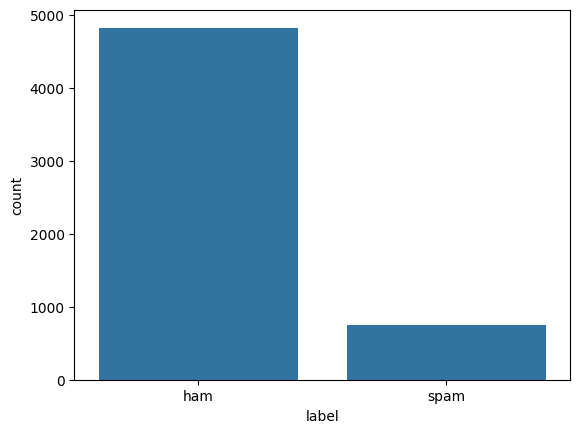

In [216]:
sns.countplot(x = 'label', data = df)

In [217]:
df.duplicated().sum()

np.int64(403)

In [218]:
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

     label                                          emailtext
102    ham  As per your request 'Melle Melle (Oru Minnamin...
153    ham  As per your request 'Melle Melle (Oru Minnamin...
206    ham  As I entered my cabin my PA said, '' Happy B'd...
222    ham                             Sorry, I'll call later
325    ham                   No calls..messages..missed calls
...    ...                                                ...
5524  spam  You are awarded a SiPix Digital Camera! call 0...
5535   ham  I know you are thinkin malaria. But relax, chi...
5539   ham                         Just sleeping..and surfing
5553   ham                        Hahaha..use your brain dear
5558   ham                             Sorry, I'll call later

[403 rows x 2 columns]


In [219]:
df.drop_duplicates(inplace=True)

In [220]:
df.shape

(5169, 2)

In [221]:
# remove stopwords
from nltk.corpus import stopwords
def pre_process(text):
   text = str(text).lower()# convert to lowercase
   spl_char_txt = re.sub('[^a-z.]', ' ', text)# remove special characters and numbers
   non_punc = [char for char in spl_char_txt if char not in string.punctuation]# remove punctuation
   non_punc = ''.join(non_punc)
   clean_txt = [word for word in non_punc.split() if word.lower() not in stopwords.words('english')]# remove stopwords
   return clean_txt

In [222]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [223]:
df['emailtext'].head()

,emailtext
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [224]:
df['emailtext'].head().apply(pre_process)

,emailtext
0,"[go, jurong, point, crazy, available, bugis, n..."
1,"[ok, lar, joking, wif, u, oni]"
2,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,"[u, dun, say, early, hor, u, c, already, say]"
4,"[nah, think, goes, usf, lives, around, though]"


In [225]:
# countvectorizor coneverts text documents into matrix of tokens
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(analyzer=pre_process).fit_transform(df['label'],df['emailtext'])

In [226]:
df1 = pd.get_dummies(df, columns=['label'], drop_first=True)
df1.head()



,emailtext,label_spam
0,"Go until jurong point, crazy.. Available only ...",False
1,Ok lar... Joking wif u oni...,False
2,Free entry in 2 a wkly comp to win FA Cup fina...,True
3,U dun say so early hor... U c already then say...,False
4,"Nah I don't think he goes to usf, he lives aro...",False


In [227]:
df1.isnull().sum()

,0
emailtext,0
label_spam,0


In [228]:
df1.head()

,emailtext,label_spam
0,"Go until jurong point, crazy.. Available only ...",False
1,Ok lar... Joking wif u oni...,False
2,Free entry in 2 a wkly comp to win FA Cup fina...,True
3,U dun say so early hor... U c already then say...,False
4,"Nah I don't think he goes to usf, he lives aro...",False


In [229]:
df1['label_spam'] = df1['label_spam'].map({True: 1, False: 0})
df1.head()

,emailtext,label_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [230]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   emailtext   5169 non-null   object
 1   label_spam  5169 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [231]:
df1.isnull().sum()

,0
emailtext,0
label_spam,0


In [232]:
df1.shape

(5169, 2)

In [233]:
df1.shape

(5169, 2)

In [243]:
#TRAIN THE MODELS"
x_train, x_test, y_train, y_test = train_test_split(bow, df1['label_spam'], test_size=0.2, random_state=0)
x_train.shape
y_train.shape


(4135,)

In [235]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [238]:
# STEP 1 : BUILD THE MODEL#
# TUNE ALL PARAMETERS#
tuned_parameters = {'kernel': ['linear', 'rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}
model = GridSearchCV(svm.SVC(), tuned_parameters)
model.fit(x_train, y_train)
print(model.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


In [239]:
# train the model with best parameters#
model1 = svm.SVC(C=10, gamma=0.001, kernel='rbf')
model1.fit(x_train, y_train)


SVC(C=10, gamma=0.001)

In [242]:
y_predict = model1.predict(x_test)
print('accuracy score is' ,accuracy_score(y_test, y_predict))
print('CLASSIFICATION REPORT IS', classification_report(y_test, y_predict))
print('CONFUSION MATRIX' , confusion_matrix(y_test, y_predict))

accuracy score is 1.0
CLASSIFICATION REPORT IS               precision    recall  f1-score   support

           0       1.00      1.00      1.00       885
           1       1.00      1.00      1.00       149

    accuracy                           1.00      1034
   macro avg       1.00      1.00      1.00      1034
weighted avg       1.00      1.00      1.00      1034

CONFUSION MATRIX [[885   0]
 [  0 149]]


In [247]:
# TRAIN THE MODEL WITH DIFFERENT PARAMETERS#
model2 = svm.SVC(C=100, gamma=0.001, kernel='linear')
model2.fit(x_train, y_train)

SVC(C=100, gamma=0.001, kernel='linear')

In [248]:
y_predict1 = model2.predict(x_test)
print('accuracy score is' ,accuracy_score(y_test, y_predict1))
print('CLASSIFICATION REPORT IS', classification_report(y_test, y_predict1))
print('CONFUSION MATRIX' , confusion_matrix(y_test, y_predict1))

accuracy score is 1.0
CLASSIFICATION REPORT IS               precision    recall  f1-score   support

           0       1.00      1.00      1.00       885
           1       1.00      1.00      1.00       149

    accuracy                           1.00      1034
   macro avg       1.00      1.00      1.00      1034
weighted avg       1.00      1.00      1.00      1034

CONFUSION MATRIX [[885   0]
 [  0 149]]


In [ ]:
# so for c= 100 the grid search cv got the best score that is 100%#